# Import libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras import datasets

## Loading dataset

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

In [9]:
width,height = x_train[0].shape
input_shape = (width,height,1)
print(input_shape)

(28, 28, 1)


## Reshaping the dataset

In [10]:
x_train = x_train.reshape(x_train.shape[0],width,height,1)
x_test = x_test.reshape(x_test.shape[0],width,height,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Train and test split

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2)

In [12]:
x_val.shape

(6000, 28, 28, 1)

## Normalising the Dataset

In [13]:
x_train = (x_train-x_train.mean())/x_train.std()
x_test = (x_test-x_test.mean())/x_test.std()
x_val = (x_val-x_val.mean())/x_val.std()

In [14]:
from tensorflow import keras

In [15]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_val = keras.utils.to_categorical(y_val)

In [18]:
num_labels = 10

## MODEL

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

In [20]:
model = Sequential()

# layer - 1
model.add(Conv2D(6,kernel_size=(5,5), strides=(1,1),activation='tanh',input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=(1,1)))

# layer - 2
model.add(Conv2D(16,kernel_size=(5,5), strides=(1,1),activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(120,kernel_size=(5,5), strides=(1,1),activation='tanh'))

# layer - 3
model.add(Flatten())

# layer - 4
model.add(Dense(84,activation='tanh'))

# layer - 5
model.add(Dense(num_labels,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 23, 23, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 9, 9, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 3000)             

In [26]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [27]:
model.fit(x_train,y_train,epochs = 20, batch_size = 32,verbose=1, validation_data=(x_val,y_val))

Epoch 1/20
1688/1688 [==============================] - 27s 15ms/step - loss: 0.2026 - accuracy: 0.9399 - val_loss: 0.1135 - val_accuracy: 0.9675
Epoch 2/20
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0993 - accuracy: 0.9695 - val_loss: 0.0891 - val_accuracy: 0.9732
Epoch 3/20
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0847 - accuracy: 0.9739 - val_loss: 0.0778 - val_accuracy: 0.9767
Epoch 4/20
1688/1688 [==============================] - 31s 18ms/step - loss: 0.0725 - accuracy: 0.9783 - val_loss: 0.0730 - val_accuracy: 0.9787
Epoch 5/20
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0689 - accuracy: 0.9785 - val_loss: 0.0915 - val_accuracy: 0.9700
Epoch 6/20
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0646 - accuracy: 0.9801 - val_loss: 0.0803 - val_accuracy: 0.9755
Epoch 7/20
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0598 - accuracy: 0.9816 - val_loss: 0.0760 -

In [28]:
score = model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.0413 - accuracy: 0.9866


In [30]:
print("testing accuracy = ",score[1])

testing accuracy =  0.9865999817848206


In [31]:
model.predict(x_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 233ms/step


array([2], dtype=int64)

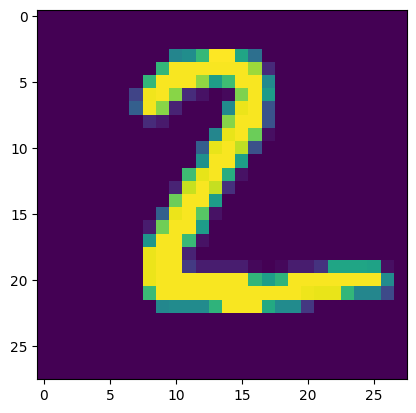

In [33]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1])